# Day 14

## Part 1

- Falling sand is coming in from `(500,0)`
- Paths define rock formations
- Sand falls down if it can
- If blocked from below, sand falls down and left
- if blocked from down and left, it falls down and right
- if blocked from down and right it stops

`How many units of sand come to rest before sand starts flowing into the abyss below?`

In [55]:
from matplotlib import pyplot as plt
from utils import parse_from_file, ParseConfig

parser = ParseConfig('\n', ParseConfig(' -> ', ParseConfig(',', int)))

rock_formations = parse_from_file('day_14.txt', parser)

print(rock_formations[:3])

[[[500, 30], [504, 30]], [[503, 28], [507, 28]], [[477, 136], [477, 133], [477, 136], [479, 136], [479, 135], [479, 136], [481, 136], [481, 127], [481, 136], [483, 136], [483, 131], [483, 136], [485, 136], [485, 129], [485, 136], [487, 136], [487, 135], [487, 136]]]


In [56]:
# lets create a grid to store the state of the cave

# first let's find the bounds of the grid
left, down, up, right = 0, 0, 0, 0
for formation in rock_formations:
    for x, y in formation:
        left = min(x, left)
        right = max(x, right)
        up = min(y, up)
        down = max(y, down)

print(f'grid bounds: {(left, down), (right, up)}')

def coord_to_index(x: int, y: int) -> tuple[int]:
    """
    converts cave coordinates to list indecies
    """
    return x - left, y - up

sand = 2
rock = 1
air = 0

# ok lets fill a grid that large with air
grid = []
for _ in range(down - up + 1):
    grid.append(list())
    for _ in range(right - left + 1):
        grid[-1].append(air)

grid bounds: ((0, 161), (578, 0))


In [57]:
# now let's fill in the rock formations
for formation in rock_formations:
    for (start_x, start_y), (end_x, end_y) in \
            zip(formation[:-1], formation[1:]):
        # print(formation, (start_x, start_y), (end_x, end_y))
        if start_y == end_y:
            low, y = coord_to_index(min(start_x, end_x), start_y)
            high, y =  coord_to_index(max(start_x, end_x), start_y)
            for x in range(low, high + 1):
                grid[y][x] = rock
        else:
            x, low = coord_to_index(start_x, min(start_y, end_y))
            x, high =  coord_to_index(start_x, max(start_y, end_y))
            for y in range(low, high + 1):
                grid[y][x] = rock

Text(0.5, 1.0, 'the grid... a digital frontier')

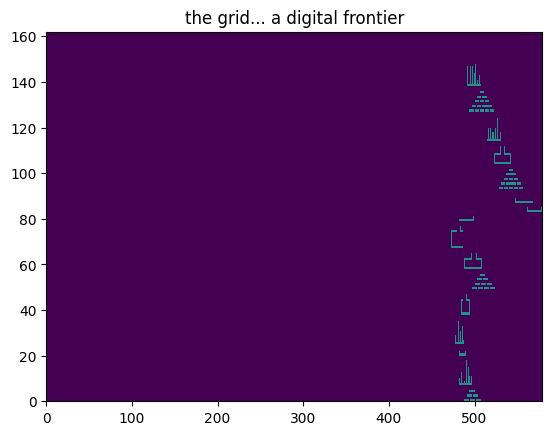

In [58]:
# let's see what we're dealing with
fig, ax = plt.subplots()
# to get the colours consistent we'll temporarily add a sand to (0,0)
temp = grid[0][0]
grid[0][0] = sand
# plot the grid in reverse to make things the right way up
ax.pcolormesh(list(reversed(grid)))
grid[0][0] = temp
ax.set_title('the grid... a digital frontier')

In [59]:
# ok, now let's add sand!
falling_sand = []

continue_iterating = True
while continue_iterating:
    falling_sand.append((500, 0))
    updated_sand = []
    for grain in falling_sand:
        x, y = coord_to_index(*grain)
        try:
            if grid[y + 1][x] == air:
                updated_sand.append((x, y + 1))
            elif grid[y + 1][x - 1] == air:
                updated_sand.append((x - 1, y + 1))
            elif grid[y + 1][x + 1] == air:
                updated_sand.append((x + 1, y + 1))
            else:
                grid[y][x] = sand
        except IndexError:
            print(x, y, coord_to_index(x, y))
            continue_iterating = False
            break
    falling_sand = updated_sand

508 161 (508, 161)


Text(0.5, 1.0, "it's coarse and it's rough and it gets everywhere!")

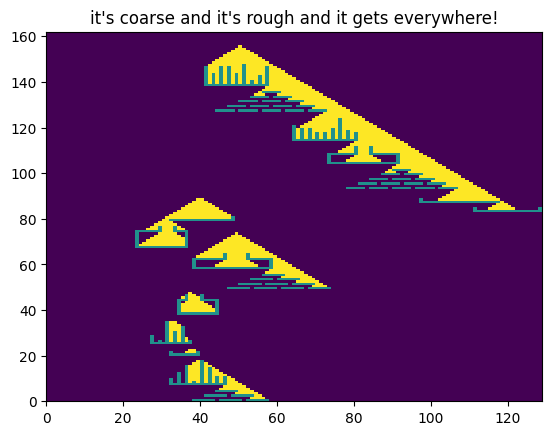

In [60]:
# the final state looks like...
fig, ax = plt.subplots()
# plot the grid in reverse to make things the right way up
ax.pcolormesh(list(reversed([row[450:] for row in grid])))
ax.set_title('it\'s coarse and it\'s rough and it gets everywhere!')

In [61]:
total_static_sand = sum([
    sum([material == sand for material in row]) for row in grid
])

print(f'the total sand that stays on the grid is: {total_static_sand}!')

the total sand that stays on the grid is: 1406!


## Part 2

- there is a floor in fact - at `highest y + 2`

`Using your scan, simulate the falling sand until the source of the sand becomes blocked. How many units of sand come to rest?`

164 674


Text(0.5, 1.0, 'the grain in spain falls gently on the infinite plane')

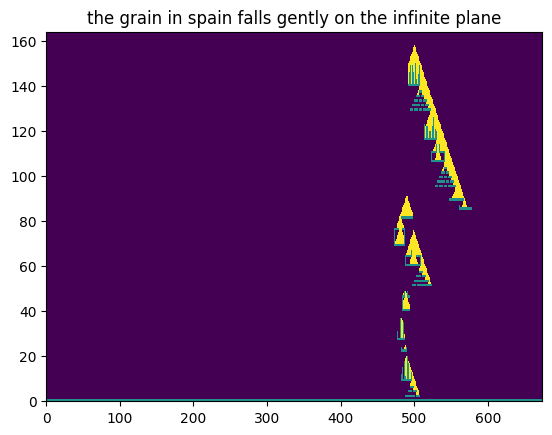

In [62]:
# the grid at the point where we'd need start caring about the floor so it
# won't have affected anything up until now - we can just add the floor and
# continue iterating
# we do also need to ensure we can support the width of the pile so that means
# extending the grid rows first
current_width = len(grid[0])
max_x = 500 + len(grid) + 2  # the max x possible for a pile that has slope 1
max_x += 10  # some additional margin just cause
for index, row in enumerate(grid):
    for _ in range(max_x - current_width):
        grid[index].append(air)

# now add the 2 rows for the floor
grid.append([air for _ in range(len(grid[0]))])
grid.append([rock for _ in range(len(grid[0]))])

print(len(grid), len(grid[0]))

# let's see what we're dealing with
fig, ax = plt.subplots()
# plot the grid in reverse to make things the right way up
ax.pcolormesh(list(reversed(grid)))
ax.set_title('the grain in spain falls gently on the infinite plane')

In [63]:
# same thing again with the mondified grid plus an additional end check
falling_sand = []

continue_iterating = True
while continue_iterating:
    falling_sand.append((500, 0))
    updated_sand = []
    for grain in falling_sand:
        x, y = coord_to_index(*grain)
        try:
            if grid[y + 1][x] == air:
                updated_sand.append((x, y + 1))
            elif grid[y + 1][x - 1] == air:
                updated_sand.append((x - 1, y + 1))
            elif grid[y + 1][x + 1] == air:
                updated_sand.append((x + 1, y + 1))
            elif grid[y][x] == sand:
                # if we get here we've tried to place sand on the starting point
                continue_iterating = False
                break
            else:
                grid[y][x] = sand
        except IndexError:
            print('index error!', x, y, coord_to_index(x, y))
            continue_iterating = False
            break
    falling_sand = updated_sand

Text(0.5, 1.0, 'the pile!')

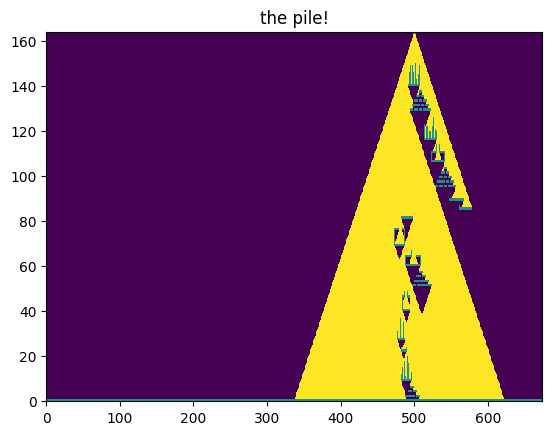

In [64]:
# let's see what we're dealing with
fig, ax = plt.subplots()
# plot the grid in reverse to make things the right way up
ax.pcolormesh(list(reversed(grid)))
ax.set_title('the pile!')

In [65]:
total_sand_in_pile = sum([
    sum([material == sand for material in row]) for row in grid
])

print(f'the total sand that stays on the grid is: {total_sand_in_pile}!')

the total sand that stays on the grid is: 20870!
